# **Ejercicio 3: Algoritmo K-Nearest Neighbors (KNN)**

###FRANCISCO JOSSE ROJAS ROJAS
###YEIRA LISETH RODRIGUEZ RODRIGUEZ

## **Documentación Detallada de KNN**

### **1. ¿Qué es K-Nearest Neighbors (KNN)?**
K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado no paramétrico y basado en instancias (o _"lazy learning"_).  
🔹 **Características clave:**  
- No construye un modelo explícito durante el entrenamiento, sino que **memoriza el dataset**.  
- La predicción se realiza "al vuelo" comparando con los datos almacenados.  
- Asume que **datos similares están cerca** en el espacio de características.  
- Uno de los algoritmos más simples pero efectivos en ML.


### **2. ¿Cómo Funciona?**  
**Pasos para predecir un nuevo punto:**  

1. **Seleccionar K**:  
   - Entero positivo que define cuántos vecinos considerar.  
   - *Ejemplo común:* `K=5` (usar 5 vecinos más cercanos).  

2. **Calcular Distancias**:  
   - Métricas comunes:  
     - **Euclidiana**: `sqrt(∑(x_i - y_i)^2)` (default)  
     - **Manhattan**: `∑|x_i - y_i|`  
     - **Minkowski**: Generalización de las anteriores.  

3. **Identificar K Vecinos Más Cercanos**:  
   - Seleccionar los `K` puntos con distancias más pequeñas.  

4. **Tomar Decisión**:  
   - **Clasificación**: Voto mayoritario (ej: si 3 de 5 vecinos son "Clase A", predecir "Clase A").  
   - **Regresión**: Promedio de los valores de los vecinos.  

📌 **Nota:** Usar `K` impar en clasificación para evitar empates.



### **3. Ventajas de KNN**  
✅ **Simplicidad**: Fácil de entender e implementar.  
✅ **No paramétrico**: No asume distribución específica de los datos.  
✅ **Flexible**: Funciona para clasificación y regresión.  
✅ **Sin fase de entrenamiento explícita**: Solo almacena los datos.  



### **4. Desventajas de KNN**  
❌ **Costoso computacionalmente**:  
   - Cada predicción requiere calcular distancias a todos los puntos (`O(n)` por predicción).  
❌ **Sensible a la escala**:  
   - Requiere normalización (ej: `StandardScaler`).  
❌ **Problemas con outliers y ruido**:  
   - Datos corruptos afectan significativamente los resultados.  
❌ **Maldición de la dimensionalidad**:  
   - Pierde efectividad con muchas features (dimensiones).  
❌ **Elección de K crítica**:  
   - `K` pequeño → Overfitting.  
   - `K` grande → Underfitting.  


### **5. Aplicaciones Típicas**  
🛒 **Sistemas de recomendación**:  
   - _"Usuarios que compraron X también compraron Y"_.  
✍️ **Reconocimiento de patrones**:  
   - Escritura, imágenes, etc.  
🏥 **Diagnóstico médico**:  
   - Clasificación de pacientes basada en síntomas.  
🔍 **Detección de fraudes**:  
   - Identificación de transacciones anómalas.  


--- Ejercicio 3: Aplicación del Algoritmo K-Nearest Neighbors (KNN) ---

Dataset generado: 200 muestras con 2 características.
Distribución de clases: Clase 0 = 100 muestras, Clase 1 = 100 muestras.

Tamaño del conjunto de entrenamiento: 140 muestras
Tamaño del conjunto de prueba: 60 muestras

Modelo KNN entrenado con K = 5 vecinos.

Precisión del Modelo (Accuracy): 0.9167

Matriz de Confusión:
 [[29  2]
 [ 3 26]]

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        31
         1.0       0.93      0.90      0.91        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



/tmp/ipython-input-5-4170782311.py:84: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap_bold,
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


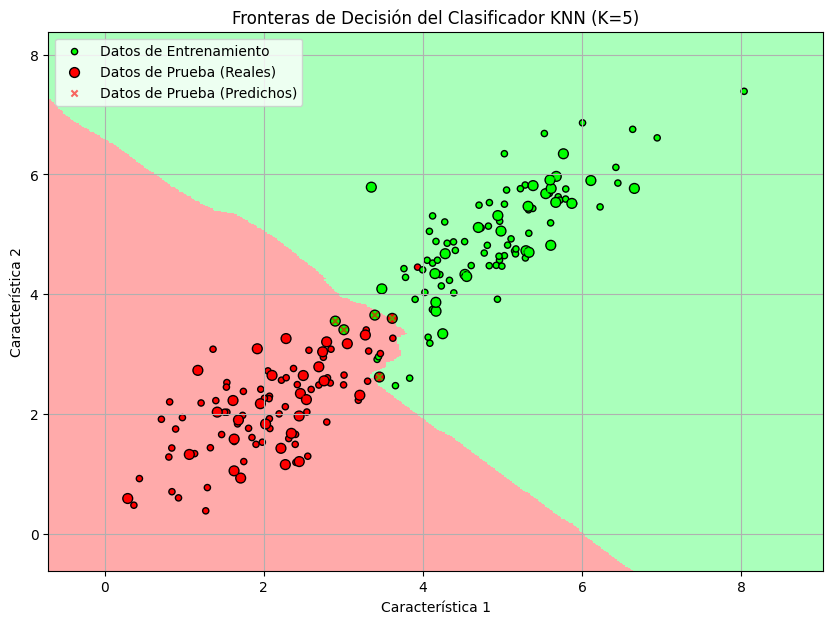


Conclusión de la aplicación KNN: El algoritmo KNN es efectivo para clasificar datos, especialmente cuando las clases están bien separadas como en este ejemplo.
 
La visualización de las fronteras de decisión muestra cómo el modelo clasifica nuevas áreas basándose en los vecinos más cercanos.
 
Es importante recordar la necesidad de escalar los datos y la sensibilidad a la dimensionalidad para aplicaciones reales.


In [5]:
#FRANCISCO JOSSE ROJAS ROJAS
#YEIRA LISETH RODRIGUEZ RODRIGUEZ

"""
Aquí un script de Python que puedes ejecutar en Google Colab para ver KNN en acción en un problema de clasificación simple. Usaremos un dataset sintético para clasificar puntos en dos categorías.
"""


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print("--- Ejercicio 3: Aplicación del Algoritmo K-Nearest Neighbors (KNN) ---\n")

# 1. Generación de un Dataset de Clasificación Sintético
# Creamos dos "nubes" de puntos para dos clases diferentes
np.random.seed(42)
num_samples = 200

# Clase 0
X0 = np.random.multivariate_normal([2, 2], [[0.8, 0.6], [0.6, 0.8]], num_samples // 2)
y0 = np.zeros(num_samples // 2)

# Clase 1
X1 = np.random.multivariate_normal([5, 5], [[0.8, 0.6], [0.6, 0.8]], num_samples // 2)
y1 = np.ones(num_samples // 2)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

print(f"Dataset generado: {len(X)} muestras con 2 características.")
print(f"Distribución de clases: Clase 0 = {np.sum(y == 0)} muestras, Clase 1 = {np.sum(y == 1)} muestras.\n")

# 2. División del Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Tamaño del conjunto de prueba: {len(X_test)} muestras\n")

# 3. Entrenamiento del Modelo KNN
# Probaremos con K=5, un valor común como se menciona en la documentación.
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

print(f"Modelo KNN entrenado con K = {k} vecinos.\n")

# 4. Realizar Predicciones
y_pred = knn_classifier.predict(X_test)

# 5. Evaluación del Modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del Modelo (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

# 6. Visualización de las Fronteras de Decisión (Opcional, pero muy ilustrativo)
h = .02  # tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir clases para cada punto en la malla
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un mapa de colores para las clases
cmap_light = ListedColormap(['#FFAAAA', '#AAFFBB']) # Colores para las regiones de fondo
cmap_bold = ListedColormap(['#FF0000', '#00FF00']) # Colores para los puntos

plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto') # Fronteras de decisión

# Plotear los puntos de entrenamiento y prueba
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Datos de Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=50, marker='o', label='Datos de Prueba (Reales)')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap_bold,
            edgecolor='blue', s=20, alpha=0.6, marker='x', label='Datos de Prueba (Predichos)') # Mostrar predicciones si se desea

plt.title(f"Fronteras de Decisión del Clasificador KNN (K={k})")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.grid(True)
plt.show()

print("""\nConclusión de la aplicación KNN: El algoritmo KNN es efectivo para clasificar datos, especialmente cuando las clases están bien separadas como en este ejemplo.\n
La visualización de las fronteras de decisión muestra cómo el modelo clasifica nuevas áreas basándose en los vecinos más cercanos.\n
Es importante recordar la necesidad de escalar los datos y la sensibilidad a la dimensionalidad para aplicaciones reales.""")

# OTRO EJEMPLO
A continuación se muestra un ejemplo de clasificación con el dataset Iris usando KNeighborsClassifier.


📊 Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

📄 Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



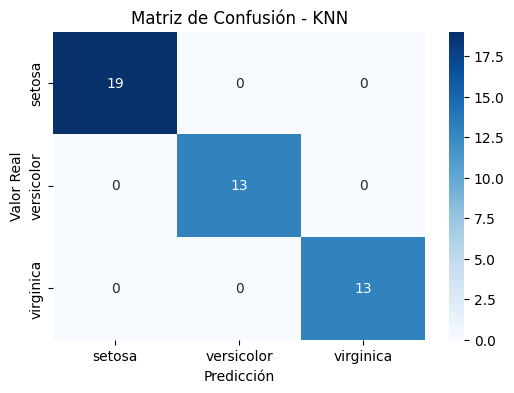

In [6]:
# --------------------------
# Ejemplo de K-NN con Iris
# --------------------------

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Escalar los datos (muy importante en K-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Crear el modelo K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Predecir y evaluar
y_pred = knn.predict(X_test)

print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',
            xticklabels=target_names, yticklabels=target_names, fmt='d')
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# 🎬 Recomendador de Películas usando K-Nearest Neighbors (K-NN)



##Objetivo del notebook

Usar K-NN para construir un **recomendador de películas**, que dada una película seleccionada, **sugiere otras películas similares** en cuanto a:

- Género (codificado)
- Duración (en minutos)
- Popularidad (escala 1-100)
- Año de lanzamiento


## ¿Cómo funciona?

1. Se crea un dataset con varias películas y sus características.
2. Se entrena un modelo K-NN para buscar películas similares.
3. El usuario elige una película.
4. El sistema devuelve las `k` películas más parecidas.

Esto simula cómo funcionan sistemas de recomendación como los de **Netflix o YouTube**.


##Herramientas usadas

- `pandas`, `numpy`: manejo de datos
- `scikit-learn`: modelo `KNeighborsClassifier`
- `matplotlib`, `seaborn`: visualización

🎬 Película seleccionada: Titanic

📽️ Películas recomendadas:
- Interstellar
- Inception
- Avengers


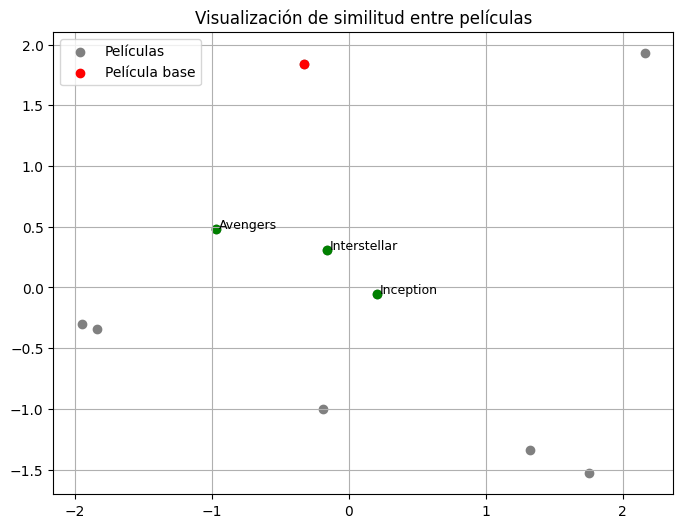

In [7]:
# Recomendador de Películas con K-NN

import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Crear un dataset simplificado
peliculas = pd.DataFrame({
    "titulo": [
        "Avengers", "Titanic", "Joker", "The Notebook", "Mad Max", "Inception",
        "Toy Story", "The Godfather", "Interstellar", "Finding Nemo"
    ],
    "genero": [0, 1, 2, 1, 0, 2, 3, 2, 2, 3],  # 0=Acción, 1=Romance, 2=Drama, 3=Animación
    "duracion": [143, 195, 122, 123, 120, 148, 81, 175, 169, 100],
    "popularidad": [90, 85, 88, 70, 80, 89, 92, 95, 87, 91],
    "año": [2012, 1997, 2019, 2004, 2015, 2010, 1995, 1972, 2014, 2003]
})

# 2. Preprocesamiento: normalizar datos
features = ["genero", "duracion", "popularidad", "año"]
X = peliculas[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Modelo K-NN
modelo_knn = NearestNeighbors(n_neighbors=4, metric='euclidean')
modelo_knn.fit(X_scaled)

# 4. Elegir una película de referencia
pelicula_referencia = "Titanic" #----- - - - - - - - - < SELECCIONAR PELICULA<<<<<<
indice = peliculas[peliculas["titulo"] == pelicula_referencia].index[0]

distancias, indices = modelo_knn.kneighbors([X_scaled[indice]])

# 5. Mostrar resultados
print(f"🎬 Película seleccionada: {pelicula_referencia}\n")
print("📽️ Películas recomendadas:")
for i in indices[0][1:]:
    print(f"- {peliculas.iloc[i]['titulo']}")

# 6. Visualización 2D con PCA (opcional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='gray', label="Películas")
plt.scatter(X_pca[indice,0], X_pca[indice,1], c='red', label="Película base")

for i in indices[0][1:]:
    plt.scatter(X_pca[i,0], X_pca[i,1], c='green')
    plt.text(X_pca[i,0]+0.02, X_pca[i,1], peliculas.iloc[i]['titulo'], fontsize=9)

plt.title("Visualización de similitud entre películas")
plt.legend()
plt.grid(True)
plt.show()